In [53]:
import pandas as pd
import pandas.io.sql as sqilo
from sqlalchemy import create_engine
import psycopg2
from psycopg2 import sql

database_name = 'telecom'
table_name= 'xdr_data'
connection_params = { "host": "localhost", "user": "postgres", "password": "123",
"port": "5432", "database": database_name}
engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")
# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data'
df = pd.read_sql(sql_query, con= engine)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [55]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [56]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [59]:
df['Handset Type'].describe()

count               149429
unique                1396
top       Huawei B528S-23A
freq                 19752
Name: Handset Type, dtype: object

In [60]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [61]:
# percent missing of total data
percent_missing(df)

The dataset contains 12.5 % missing values.


In [62]:
# Now which column(s) has missing values
df.isna().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [63]:
percent_missing(df['TCP UL Retrans. Vol (Bytes)'])

The dataset contains 64.43 % missing values.


In [64]:
percent_missing(df['TCP UL Retrans. Vol (Bytes)'])

The dataset contains 64.43 % missing values.


In [65]:
percent_missing(df['HTTP DL (Bytes)'])

The dataset contains 54.32 % missing values.


In [66]:
percent_missing(df['HTTP DL (Bytes)'])

The dataset contains 54.32 % missing values.


In [67]:
# 1. drop columns with more than 30% missing values
df_clean = df.drop(['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)' ,'HTTP DL (Bytes)', 'HTTP UL (Bytes)'], axis=1)
df_clean.shape

(150001, 45)

In [68]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


<Axes: >

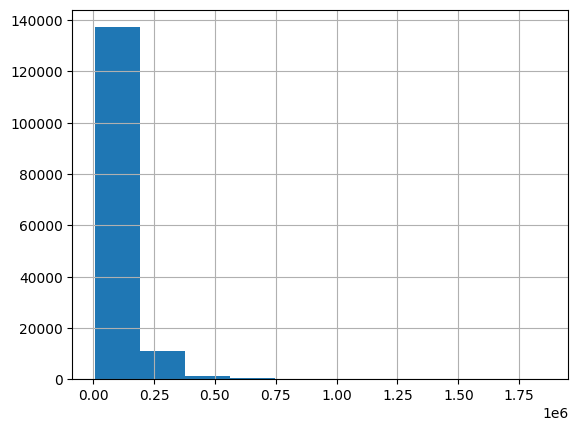

In [69]:
df['Dur. (ms)'].hist()

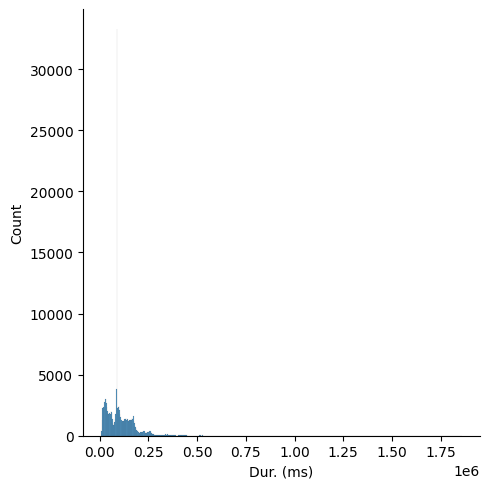

In [70]:
import seaborn as sns
sns.displot(data=df, x=df['Dur. (ms)'])

In [71]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()



pd.options.display.float_format = format_float

NameError: name 'format_float' is not defined

In [ ]:
#the Top 10 Handset Manufacturers used by customers
handset_counts = df['Handset Type'].value_counts()
top_10_handsets = handset_counts.head(10)
print("Top 10 handsets ")
print(top_10_handsets)

Top 10 handsets 
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


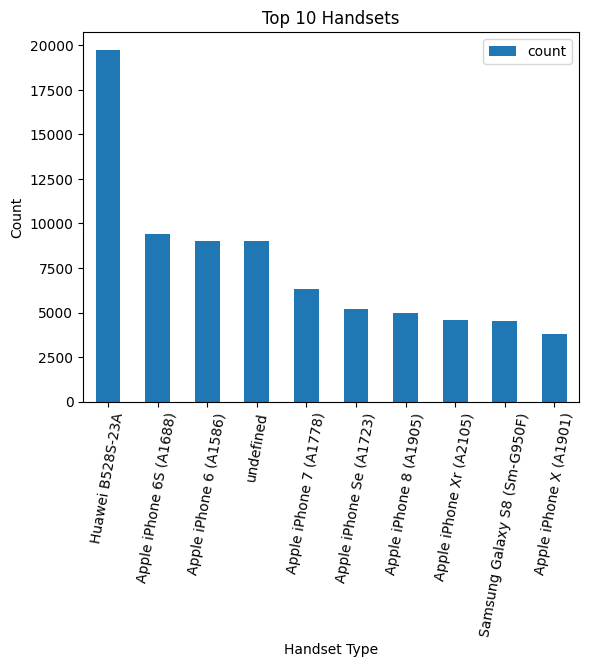

In [ ]:
value_counts = df['Handset Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()


top_10_df = pd.DataFrame(value_counts)
top_10_df.plot(kind= 'bar',rot=80)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets')
plt.show(10)

In [ ]:
#Top 3 handset Manufacturers 
handset_manufacturer=df['Handset Manufacturer'].value_counts()
top_3_handset_manufacturers=handset_manufacturer.head(3)
print("The top  3 handset manufacturers ")
print(top_3_handset_manufacturers)

The top handset manufacturers 
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


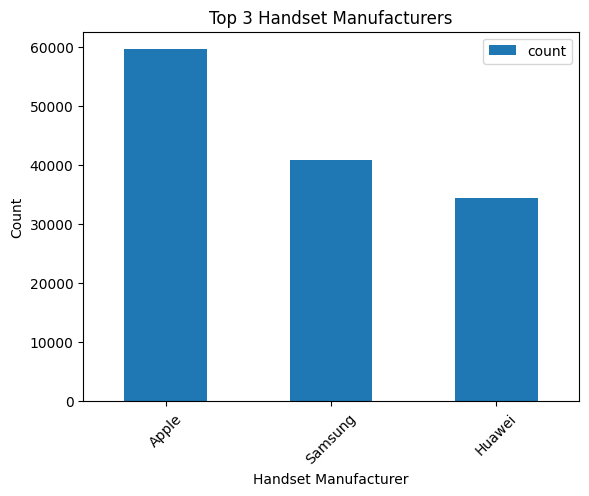

In [ ]:
value_counts = df['Handset Manufacturer'].value_counts()[:3]
top_3_manufacturers = value_counts.index.tolist()

top_3_df = pd.DataFrame(value_counts)
top_3_df.plot(kind='bar', rot=45)

plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers')
plt.show()


In [ ]:
# The top 5 handsets per top 3 handset manufacturer
top3_handsetManufacturers=handset_manufacturer.head(3).index
filtered_df = df[df['Handset Manufacturer'].isin(top3_handsetManufacturers)]
columns_of_interest=['Handset Manufacturer', 'Handset Type']
top_handsets_per_manufacturer = filtered_df.groupby(columns_of_interest).size().reset_index(name='count')
top_handsets_per_manufacturer = top_handsets_per_manufacturer.sort_values(by=['Handset Manufacturer', 'count'], ascending=[True, False])
top5_handsets_per_manufacturer = top_handsets_per_manufacturer.groupby('Handset Manufacturer').head(5)

print("Top 5 handsets per top 3 handset manufacturers and their counts")
print(top5_handsets_per_manufacturer)

Top 5 handsets per top 3 handset manufacturers and their counts
    Handset Manufacturer                    Handset Type  count
35                 Apple         Apple iPhone 6S (A1688)   9419
31                 Apple          Apple iPhone 6 (A1586)   9023
41                 Apple          Apple iPhone 7 (A1778)   6326
55                 Apple         Apple iPhone Se (A1723)   5187
48                 Apple          Apple iPhone 8 (A1905)   4993
83                Huawei                Huawei B528S-23A  19752
104               Huawei                    Huawei E5180   2079
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2021
182               Huawei                      Huawei P20   1480
224               Huawei                  Huawei Y6 2018    997
359              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
242              Samsung      Samsung Galaxy A5 Sm-A520F   3724
292              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
284              Samsung     Samsung Gal

In [ ]:
df_clean['Total UL (Bytes)'].min()

2866892.0

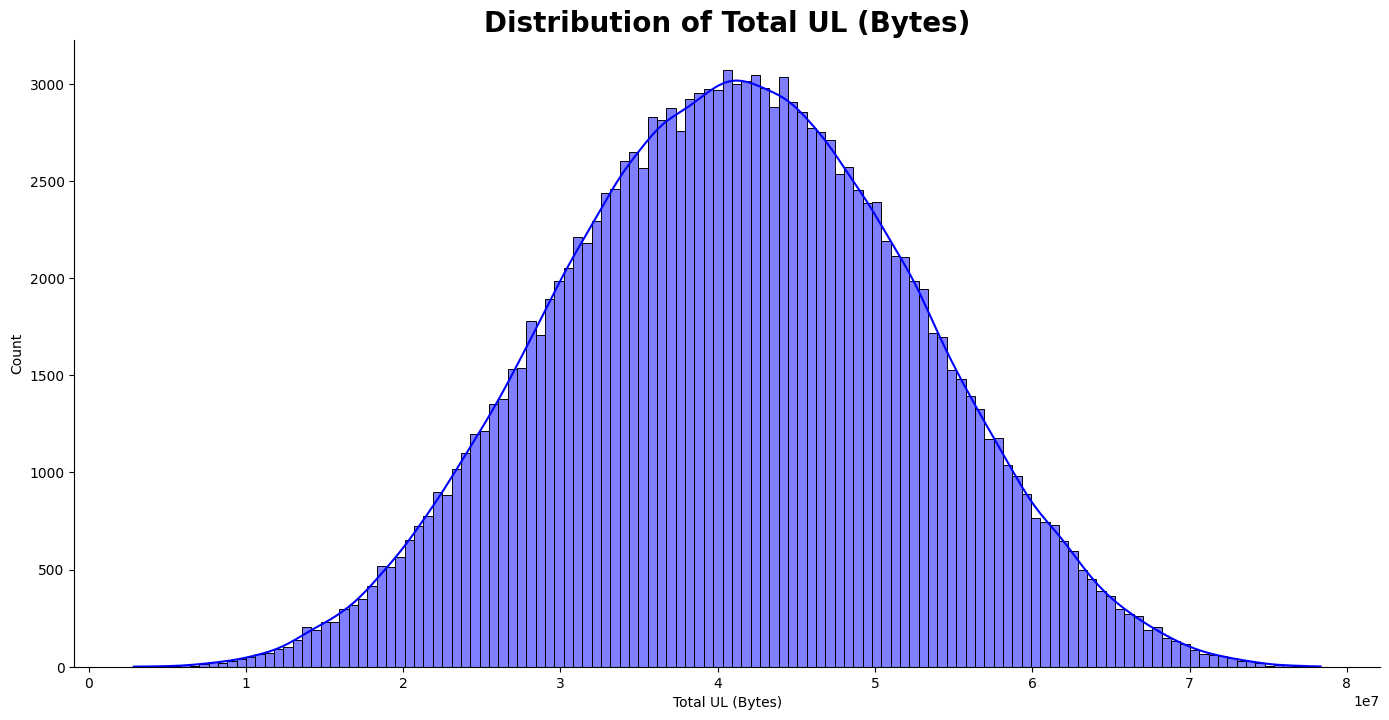

In [ ]:
plot_hist(df_clean, "Total UL (Bytes)", "blue")

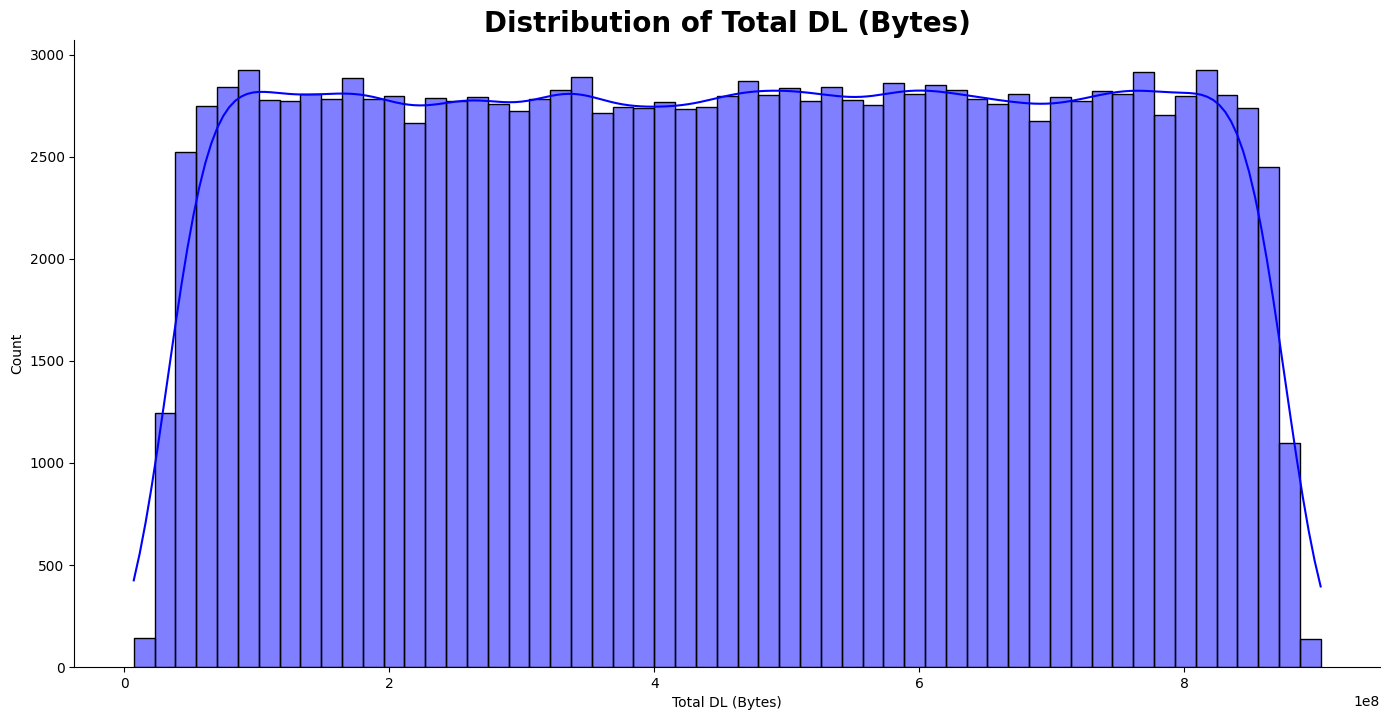

In [ ]:
plot_hist(df_clean, "Total DL (Bytes)", "blue")

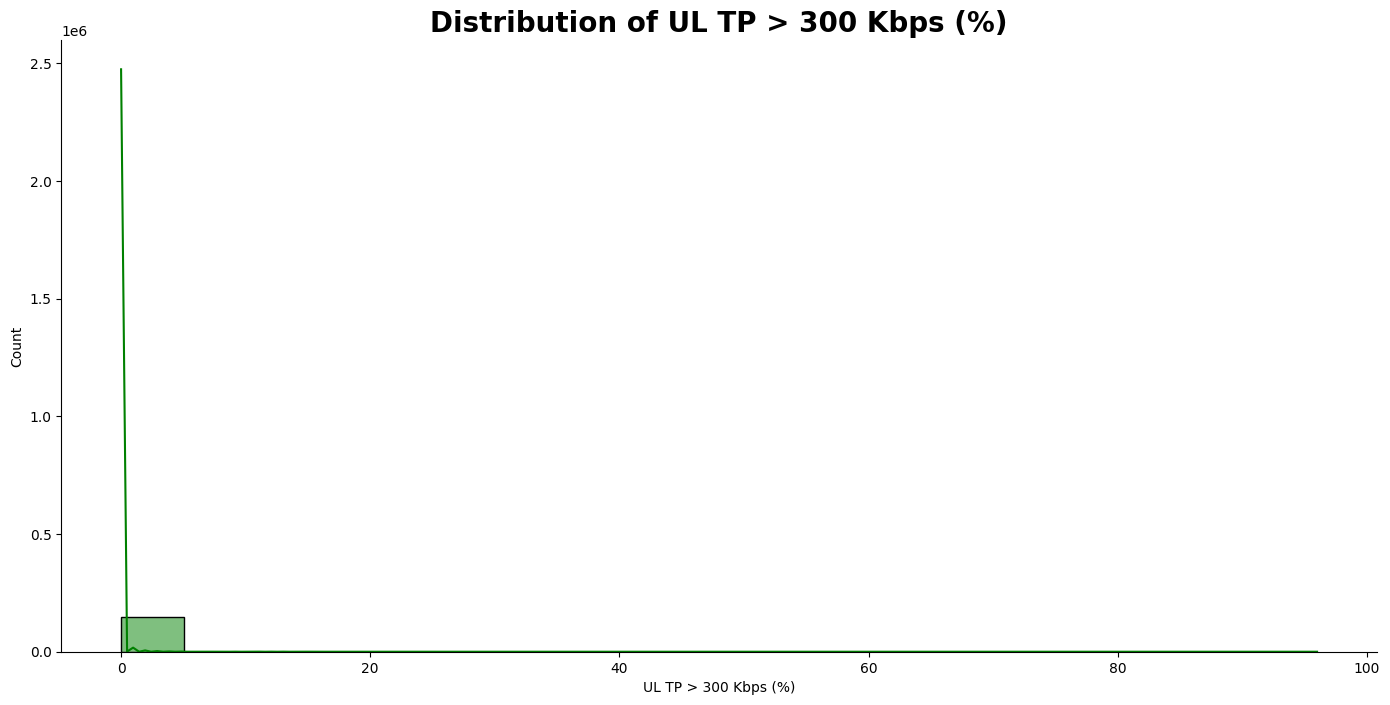

In [ ]:
plot_hist(df_clean, "UL TP > 300 Kbps (%)", "green")

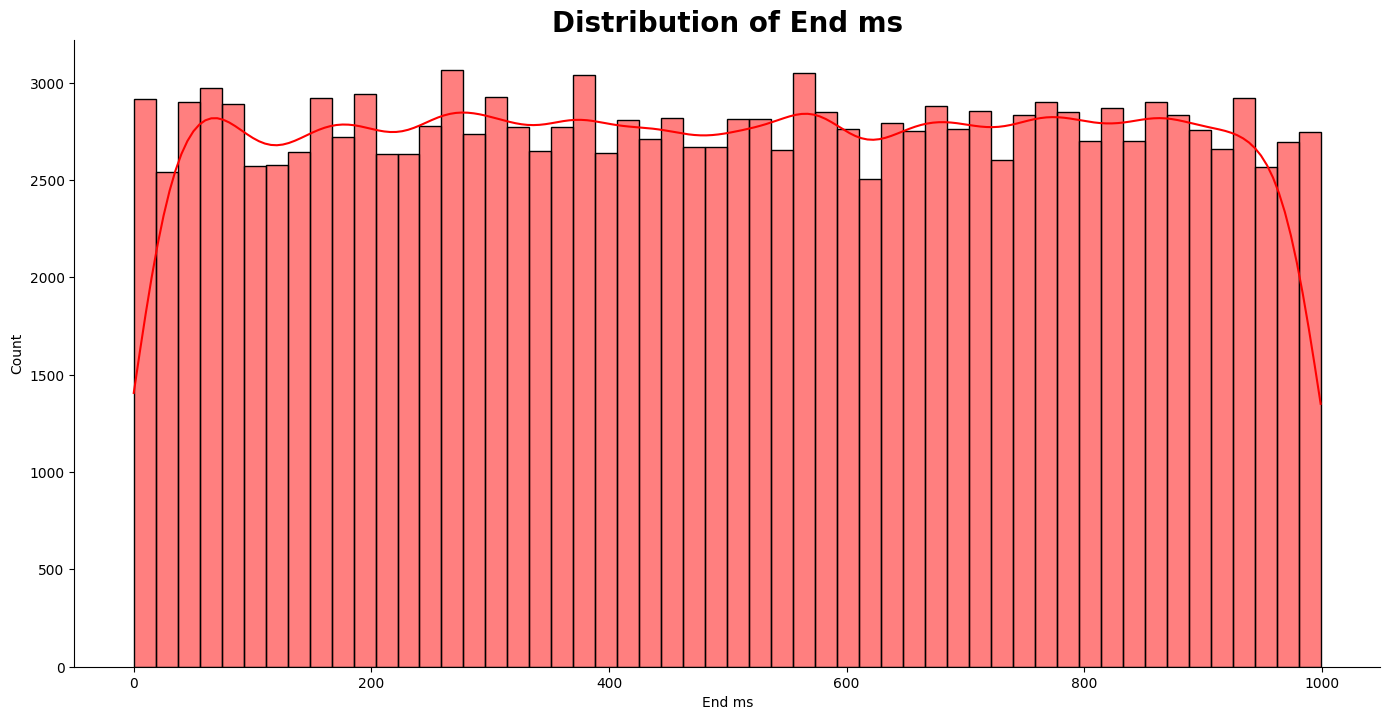

In [ ]:
plot_hist(df_clean, "End ms", "red")

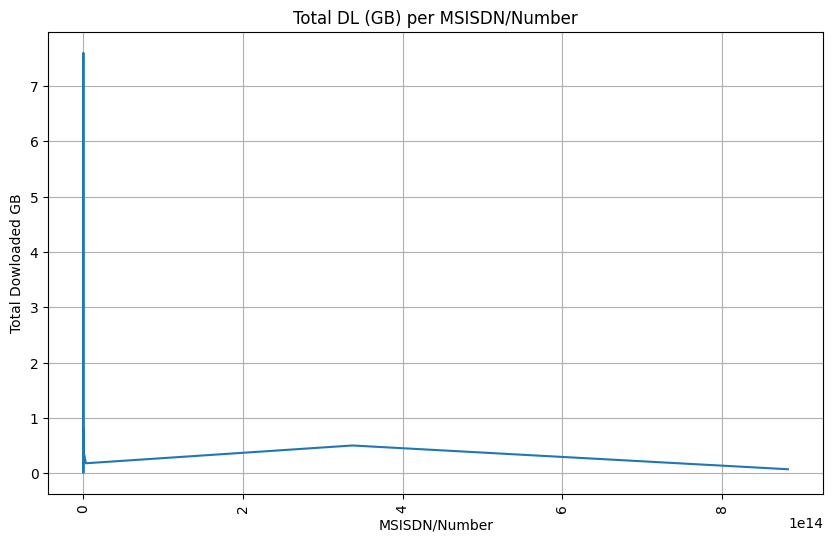

In [ ]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "sum"})
aggregated_data['Total DL (GB)'] = aggregated_data['Total DL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total DL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Dowloaded GB')
plt.title('Total DL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

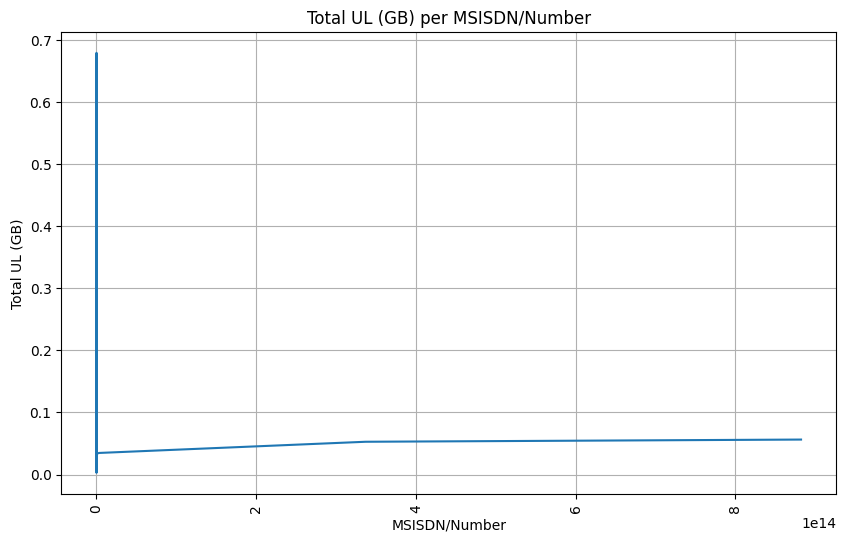

In [ ]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total UL (Bytes)": "sum"})
aggregated_data['Total UL (GB)'] = aggregated_data['Total UL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total UL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total UL (GB)')
plt.title('Total UL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

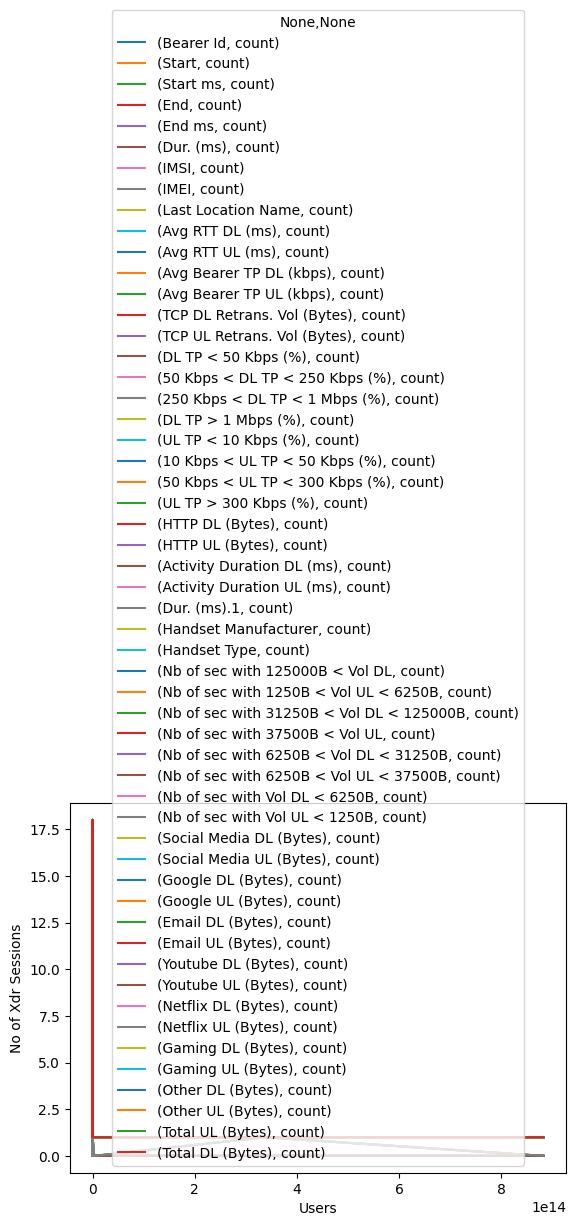

In [ ]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"count"})
aggregated_data.head(10)
aggregated_data.plot()
plt.ylabel("No of Xdr Sessions")
plt.xlabel("Users")
plt.show()